# EDA

## Import Necessary Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load Data

In [2]:
cd ..

C:\Users\Caitlin\Documents\Brett_TTT_projects\predicting_cust_churn


In [3]:
features_train = pd.read_parquet('features_train.parquet')
target_train = pd.read_parquet('target_train.parquet')

features_test = pd.read_parquet('features_test.parquet')
target_test = pd.read_parquet('target_test.parquet')

In [4]:
features_train.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,p_i_or_b,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,customer_duration
0,month-to-month,no,mailed check,29.15,29.15,male,0,no,no,internet,dsl,no,no,no,yes,no,no,NaN,16.283308
1,month-to-month,yes,electronic check,45.30,45.30,female,0,no,no,both,dsl,no,no,no,no,no,no,no,16.766160
2,month-to-month,yes,electronic check,94.20,1046.10,female,0,no,no,both,fiber optic,no,no,no,no,yes,yes,yes,351.398079
3,two year,yes,mailed check,29.60,299.05,female,0,no,no,internet,dsl,no,no,no,yes,no,no,NaN,293.301260
4,month-to-month,no,mailed check,20.00,32.70,male,0,no,no,phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,48.921917


In [5]:
for col_name in features_train.columns:
    print(f"Train {col_name}: {features_train[col_name].describe()}\n Test {col_name}: {features_test[col_name].describe()}\n\n")

Train type: count               5634
unique                 3
top       month-to-month
freq                3085
Name: type, dtype: object
 Test type: count               1409
unique                 3
top       month-to-month
freq                 790
Name: type, dtype: object


Train paperless_billing: count     5634
unique       2
top        yes
freq      3335
Name: paperless_billing, dtype: object
 Test paperless_billing: count     1409
unique       2
top        yes
freq       836
Name: paperless_billing, dtype: object


Train payment_method: count                 5634
unique                   4
top       electronic check
freq                  1891
Name: payment_method, dtype: object
 Test payment_method: count                 1409
unique                   4
top       electronic check
freq                   474
Name: payment_method, dtype: object


Train monthly_charges: count    5634.000000
mean       64.644054
std        30.165390
min        18.250000
25%        35.212500
50%       

The only categorical variable which did not have the same top value between training and testing sets was 'start_dayofweek'. Let's get a look at the value_counts for this variable from our training and testing sets.

We can see that there are some differences in the distribution between start_dayofweek_cat in the training and testing distributions. This is not necessarily a problem as each value is receiving adequate representation in the trianing set (which is most important) as well as in the test set. However, this result does suggewst something important about the start_dayofweek_cat feature which is that start_dayofweek may not be that predictive of churn. Since we set stratify=target in our train_test_split method the different values of our binary target variable will be evenly distributed between the test and target sets. Therefore, if a feature were highly predictive of our target variable, we would expect that an equal distribution of target variable values between training and test sets would lead to an equal distribution of that feature's values between training and test set. This relationship is merely a tendency, however, because there may be particular combinations of the other variables which may overpower the relevance of this single start_dayofweek_cat variable, such that equal target variable value distribution does not entail equal start_dayofweek_cat feature distribution. It also may be the case that the test set is just no large enough to reveal this relationship even if it exists. We will find out for sure when we run the feature_importance() metod on our gradient boosting models. 

In totality, we can see from the above output that the distributions for each feature are pretty similar between training and test set. On occasion, there is a mild category error when binary categorical variables are encoded as int dtypes. However, the frequency of the given answer can still be discerned based on the mean because in these instances mean can just be interpreted as the percentage of responses that had a positive answer. Therefore, insofar as those means between the training set feature and the test set feature are equal or similar, we know we have similar enough distributions for that feature between our training and test set.  

The distributions of the feature variables were between training and test sets were quite similar. As noted above, when we set stratify=target and our feature variable values are not evenly distributed between training and test sets, this suggests that that feature may not be very predictive of the target variable value. However, the reverse is also true. When the feature variable values are evenly distributed between training and test sets when we have stratified the target variable, this suggests that the feature variable is predictive of the target variable value. Moreover, while this relationship is only suggestive, the more features we have whose values are equally distributed between training and test sets, the more likely it is that our features are picking up on genuine signal between the features and the target. In other words, even though anyone of these given feature variables may only be weakly predictive of the target variable on its own, widespread equal distribution between training and test sets of feature variable values is strong evidence that there is a relationship between the features and the target. In other words, preliminarily, we seem to be in pretty good shape. 

We might also note that describe() offers more detail for numeric variables, revealing that while the central tendancies of the datetime variables we translated to radians spanned on the unit circle for sin and cosine measurements showed some discrepancy, each discrepancy between the central tendancies of those variables between the training and test sets did not even amount to half a standard deviation. Moreover, we can also see that from the identical medians that any discrpancies between the means likely resulted from outliers. All of this is true for the start_datyofweek variable as well. Therefore, while start_dayofweek appeared to have notable difference when encoded categorically (suggesting a lacking relatinoship to the target variable value), it is likely that the relationship is there, but has an ordinal quality to it. That is, the relationship may not between canceling subscription and Friday per say, but there may be relationship between canceling a subscription and a time later in the week. This kind of tendency would be better captured by the ordinal structure of encoding these datetime variables as radians on the unit circle when measured in terms of both sin and cosine. That is why I encoded both ategorical and cylcial versions of these variables. 

Let's get a closer look at the start_dayofweek sine and cosine feature and the start_dayofweek_cat distributions for both the training set and the test set since this was the variable that showed the most discrepancy. Let's also get a look at the contract type, paperless billing, payment method, monthly charges, and total charges variables, as, a-priori, I suspect these will be pivotal.  

In [6]:
# Instruct matplotlib to use seaborn presentation style
plt.style.use('seaborn-v0_8')
sns.set_theme(style='whitegrid')

In [7]:
# Create list of names and DataFrames for easy plotting with for loops
names = ['Train', 'Test']
df_list = [features_train, features_test]
hist_cols = ['monthly_charges', 'total_charges', 'customer_duration']
x_ticks_range = [range(0, 150, 25), range(0, 10000, 2000), range(-13, 2200, 600)]
plot_index = 1

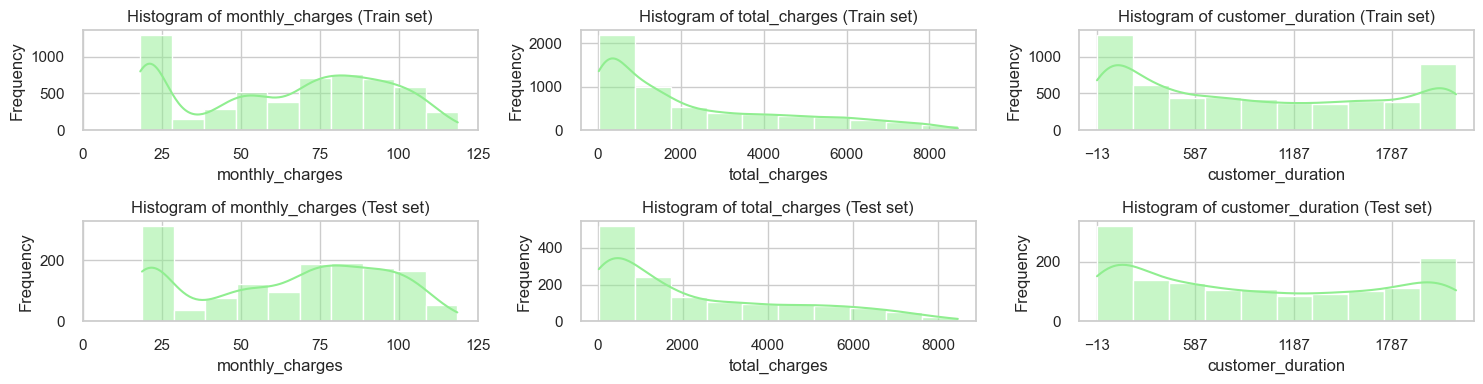

In [8]:
plt.figure(figsize=(15, 4))
for df, name in zip(df_list, names):
    for col, tick in zip(hist_cols, x_ticks_range):
        plt.subplot(2, 3, plot_index)
        sns.histplot(data=df, x=df[col], bins=10, kde=True, color='lightgreen')
        plt.xticks(ticks=tick)
        plt.title(f'Histogram of {col} ({name} set)')
        plt.xlabel(f"{col}") 
        plt.ylabel('Frequency')
        plot_index += 1
plt.tight_layout()
plt.show() 

Evidently, the distributions for these features between the training and test sets are quite similar. The only feature that shows any deviation at all is start_dayofweek_cos where 0.5 shows the greatest frequency in the training set and is tied for second greatest frequency in the test set. Otherwise, the distributions for this feature are quite similar, and the distributions for the other features are nearly identical. 

Next, let's get a look at the categorical variables we said we would plot. 

In [9]:
bar_plot_cols = ['type', 'payment_method', 'p_i_or_b']
plot_index = 1

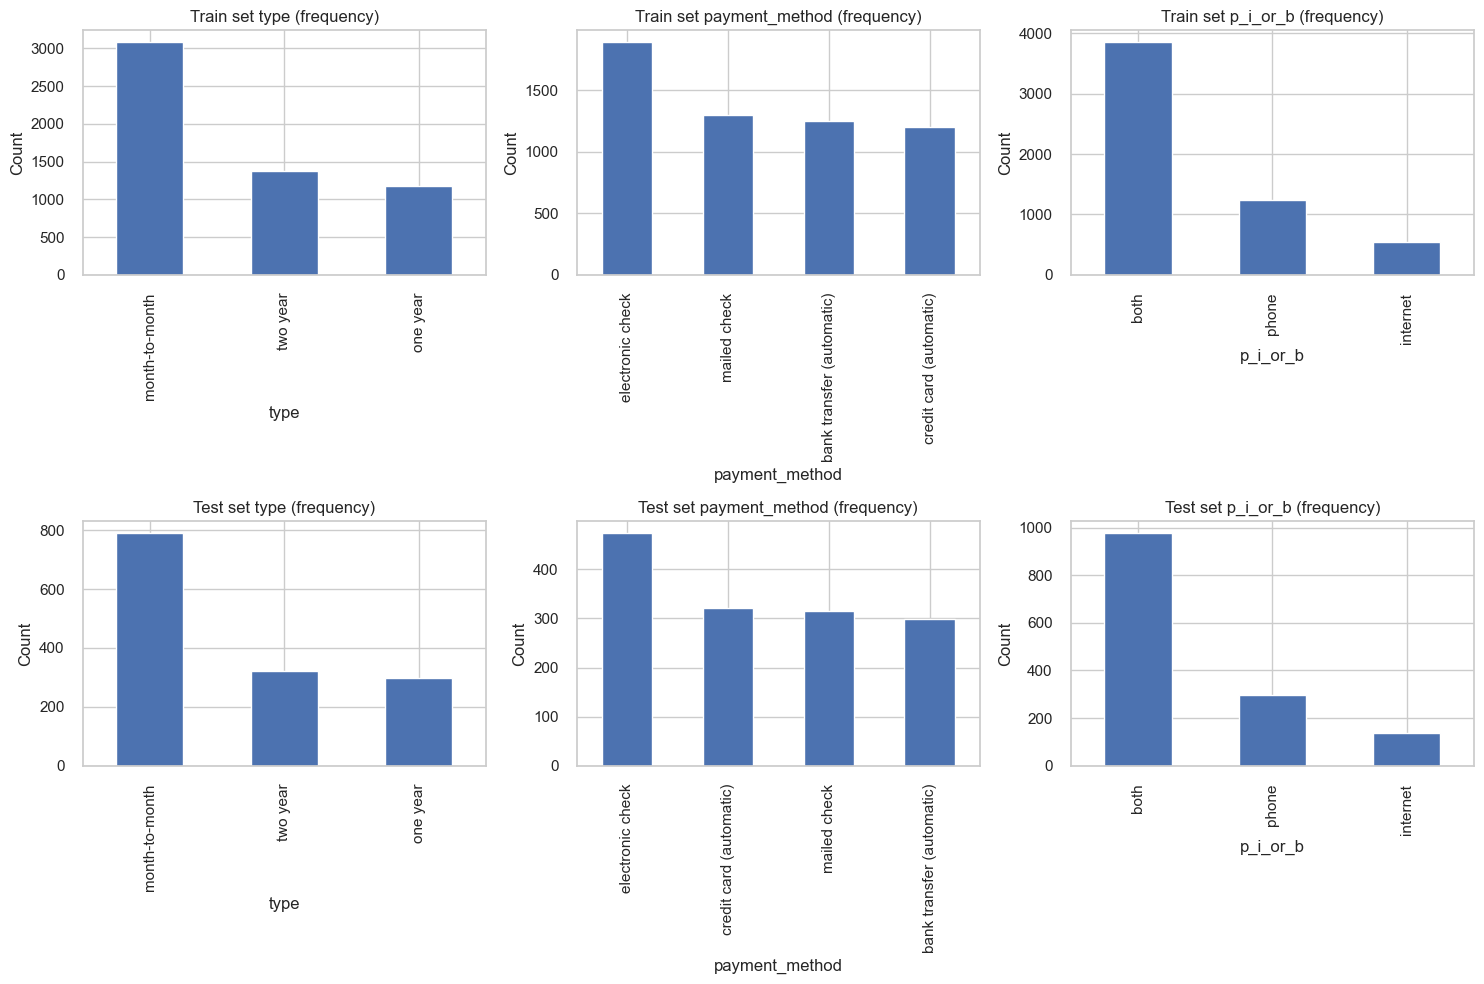

In [10]:
# Set up subplots
plt.figure(figsize=(15, 10))
for df, name in zip(df_list, names):
    for col in bar_plot_cols:
        plt.subplot(2, len(bar_plot_cols), plot_index)
        df[col].value_counts().plot(kind='bar')
        plt.title(f'{name} set {col} (frequency)')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plot_index += 1

plt.tight_layout()
plt.show()

Again, these distributions are quite similar. The distribution of the 'type' feature between the two data sets is virtually identical. However, there are some slight differences for the latter two features. For 'payment_method', credit card (automatic), mailed check, and bak transfer (automatic) are all nearly identical. However, in the training set mailed check is second most common, bank transfer (automatic) is third most common, and credit card (automatic) is least common. Meanwhile, for the test set, credit card (automatic) is second most common, mailed check is third most common, and bank transfer (automatic) is least common. For both sets, electronic check was most popular.

As we had noted above, there was considerable variability in the order of the modes of the distribution even though the shape of the distribution is nearly identical. I will simply list the mode orderings of the values in those distributions below:

Training set:

Saturday (5)  
Sunday (6)  
Friday (4)  
Tuesday (1)  
Wednesday (2)  
Thursday (3)  
Monday (0)  
Test set:

Sunday (6)  
Saturday (5)  
Wednesday (2)  
Friday (4)  
Monday (0)  
Tueday (1)  
Thursday (3).  

While there is some discrepancy here, it is fair to say that for both distributions, days considered part of the weekend (including Friday) were the most common start days and days towards the beginning of the week tended to be the least common start days. This likely reflects the fact that people have more time to sign up for services during the weekend when they are not working.

Let's also get a look at the distribution of our target variable values. 

In [11]:
target_train.value_counts()

churn
0        4139
1        1495
Name: count, dtype: int64

In [12]:
target_test.value_counts()

churn
0        1035
1         374
Name: count, dtype: int64

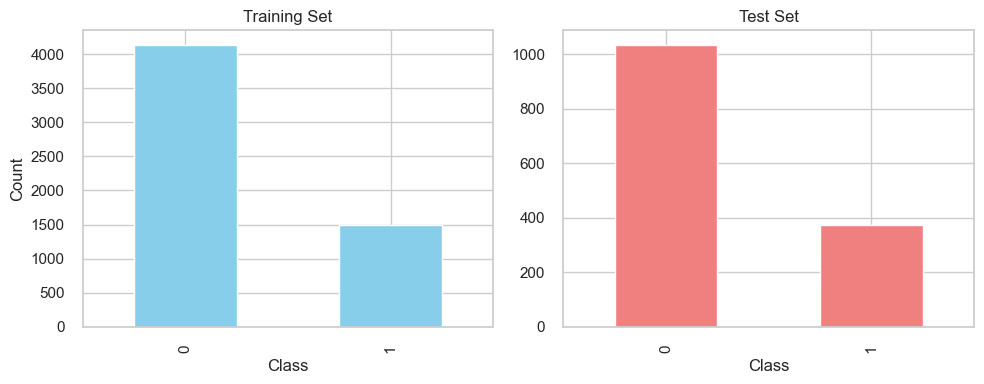

In [13]:
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot for target_train
target_train.value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Training Set')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['0', '1'])

# Plot for target_test
target_test.value_counts().sort_index().plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Test Set')
axes[1].set_xlabel('Class')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['0', '1'])

plt.tight_layout()
plt.show()

As you can see, the distribution shape for the target variable is nearly identical between the trianing and test set. 